In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("mbti_1.csv")

In [61]:
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [62]:
len(df)

8675

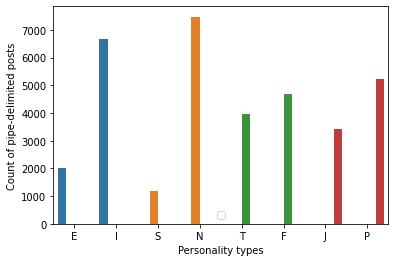

In [63]:
tot_mbti_posts=[]
for i in "EISNTFJP":
    tot_mbti_posts.append(sum([1 if i in x else 0 for x in df['type']]))
    
total_per_posts_df=pd.DataFrame(zip(tot_mbti_posts,['E','I','S','N','T','F','J','P']
                                    ,['EI','EI','SN','SN','TF','TF','JP','JP'])
                                 ,columns=['total_posts','personality','group'])
sns.barplot(x='personality',y='total_posts',hue='group',data=total_per_posts_df)
plt.xlabel('Personality types')
plt.ylabel('Count of pipe-delimited posts')
plt.legend([])
plt.show()

In [64]:
df['num_of_posts']= [len([x for x in post.split('|||') if len(x)>0]) for post in df['posts']]

In [65]:
comments_by_type=df.groupby("type")['num_of_posts'].sum().reset_index()
comments_by_type

,type,num_of_posts
0,ENFJ,9283
1,ENFP,32610
2,ENTJ,11235
3,ENTP,33544
4,ESFJ,2018
5,ESFP,2213
6,ESTJ,1916
7,ESTP,4329
8,INFJ,71948
9,INFP,89595


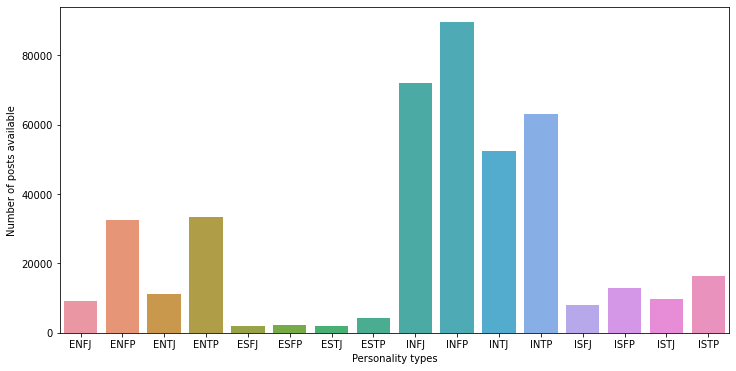

In [66]:
plt.figure(figsize = (12,6))
sns.barplot(x='type',y='num_of_posts',data=comments_by_type)
plt.xlabel('Personality types')
plt.ylabel('Number of posts available')
plt.show()

In [9]:
#consider only posts greater than or eaual to 50
#df=df[df['num_of_posts']>=50]

In [67]:
len(df)

8675

In [68]:
df.head()

,type,posts,num_of_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50
1,ENTP,'I'm finding the lack of me in these posts ver...,50
2,INTP,'Good one _____ https://www.youtube.com/wat...,50
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50
4,ENTJ,'You're fired.|||That's another silly misconce...,50


In [69]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [70]:
import regex as re,emoji,string

In [71]:
def find_emoji(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [27]:
#[[print(find_emoji(x)) for x in post.split("|||") if len(find_emoji(x))>0] for post in df['posts']]

['😂']
['😂', '😂']
['™']
['♥']
['😊']
['😁']
['😂']
['😋']
['😱']
['☂']
['❤️', '❤️', '❤️']
['™']
['®']
['❤️']
['😝']
['😂']
['😂']
['😐']
['😋']
['😉']
['🌹']
['👏', '👏', '👏', '👏', '🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['👌', '🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🤗', '🤗', '🤗', '🌹']
['🌹']
['🌹']
['🌹']
['👏', '👏', '👏', '👏', '👏']
['🤓']
['🌹']
['😊', '🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['🌹']
['😃']
['™']
['♥']
['✍']
['❤']
['❤']
['😜']
['♥']
['♥', '♥']
['™']
['😂']
['😊']
['😊']
['😊']
['😊']
['😀']
['😂', '😂', '😂']
['®']
['🦄']
['😄']
['♥', '♥', '♥', '♥']
['®']
['✝', '✝']
['®']
['♥']
['😉']
['♥']
['❤', '❤', '❤']
['™']
['😊', '😂']
['❤']
['👋']
['♥']
['💓', '💓', '💎', '🔥']
['😋', '😅', '😄', '💓', '💓', '💎', '🔥']
['💎', '🔥']
['👋', '😊', '💎', '🔥']
['💎', '🔥']
['💎', '🔥']
['💎', '🔥']
['💎', '🔥']
['💎', '🔥']
['😬']
['😮', '👈']
['😬']
['👍']
['👍', '👍']
['😄', '👍']
['😕']
['😳', '😳']
['😧', '😧', '😢', '😢']
['😋']
['😬', '😞']
['😧']
['😕']
['😄', '😄']
['😧', '😣', '😕']
['🙋']
['👍']
['😊']
['☺️']
['♥']
['♥']
['✔', '✔']
['®']
['😊']
['❤️', 

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [None, None],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [None],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [None],
 [],
 [],
 [],
 [],
 [None],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []

In [72]:
df['emoji_count']=[len(find_emoji(post)) for post in df['posts']]

In [73]:
df.head()

,type,posts,num_of_posts,emoji_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0


In [74]:
df['emoji_count'].value_counts()

0     8536
1       88
2       22
3       11
4        6
5        3
6        2
8        1
96       1
42       1
11       1
14       1
46       1
55       1
Name: emoji_count, dtype: int64

In [75]:
df['emojis']=[find_emoji(post) for post in df['posts']]

In [76]:
df[df['emoji_count']>0].head()

,type,posts,num_of_posts,emoji_count,emojis
83,ENTJ,'Bump|||Escobar and Co. Escobar- ENTJ Gustavo...,50,3,"[😂, 😂, 😂]"
161,INTJ,'Above and on top of that what really irked th...,50,1,[™]
182,INTP,'What are you? A weakling? You're just going t...,50,1,[♥]
189,ISTJ,"'If it's not what you expected, try browns ins...",50,1,[😊]
396,ENFP,The ENFP Te Bitch Slap Revealed This has happ...,50,4,"[😁, 😂, 😋, 😱]"


In [77]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hari.somayajula\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hari.somayajula\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [86]:
sw = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [87]:
df['clean_posts']=df['posts'].apply(lambda x: clean_text(x))

In [88]:
df.head()

,type,posts,num_of_posts,emoji_count,emojis,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moments, sportscenter, top, ten, plays,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, finding, lack, posts, alarmingsex, boring..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, blessing..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoyed, conversation, day, esote..."
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept..."


In [90]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hari.somayajula\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [92]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hari.somayajula\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [93]:
#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
df['clean_posts'] = df['clean_posts'].apply(lambda x: lem(x))

In [95]:
df.head(10)

,type,posts,num_of_posts,emoji_count,emojis,clean_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"[intj, moment, sportscenter, top, ten, play, p..."
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"[im, find, lack, post, alarmingsex, bore, posi..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"[good, one, course, say, know, thats, bless, c..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"[dear, intp, enjoy, conversation, day, esoteri..."
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"[youre, firedthats, another, silly, misconcept..."
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,50,0,[],"[science, perfect, scientist, claim, scientifi..."
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",50,0,[],"[cant, draw, nail, haha, do, professional, nai..."
7,INTJ,'I tend to build up a collection of things on ...,50,0,[],"[tend, build, collection, thing, desktop, use,..."
8,INFJ,"I'm not sure, that's a good question. The dist...",50,0,[],"[im, sure, thats, good, question, distinction,..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,50,0,[],"[position, actually, let, go, person, due, var..."


In [101]:
#From lists of comments to a single list containing all words      
all_words=[]        
#for i in range(len(df)):
    #all_words = all_words + df['clean_posts'][i]

In [97]:
#5348769
#len(all_words)

5348769

In [98]:
import numpy as np

In [100]:
#len(np.unique(all_words))

In [108]:
df['clean_posts']=[str(thing) for thing in df['clean_posts']]

In [110]:
blob=TextBlob(df['clean_posts'][0])

In [113]:
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df['clean_posts'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
df['sentiment']=sentiment

In [114]:
df.head(10)

,type,posts,num_of_posts,emoji_count,emojis,clean_posts,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50,0,[],"['intj', 'moment', 'sportscenter', 'top', 'ten...",0.098116
1,ENTP,'I'm finding the lack of me in these posts ver...,50,0,[],"['im', 'find', 'lack', 'post', 'alarmingsex', ...",0.098953
2,INTP,'Good one _____ https://www.youtube.com/wat...,50,0,[],"['good', 'one', 'course', 'say', 'know', 'that...",0.129627
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50,0,[],"['dear', 'intp', 'enjoy', 'conversation', 'day...",0.096569
4,ENTJ,'You're fired.|||That's another silly misconce...,50,0,[],"['youre', 'firedthats', 'another', 'silly', 'm...",0.011339
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,50,0,[],"['science', 'perfect', 'scientist', 'claim', '...",0.067968
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",50,0,[],"['cant', 'draw', 'nail', 'haha', 'do', 'profes...",0.110950
7,INTJ,'I tend to build up a collection of things on ...,50,0,[],"['tend', 'build', 'collection', 'thing', 'desk...",0.090952
8,INFJ,"I'm not sure, that's a good question. The dist...",50,0,[],"['im', 'sure', 'thats', 'good', 'question', 'd...",0.073609
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,50,0,[],"['position', 'actually', 'let', 'go', 'person'...",0.161103


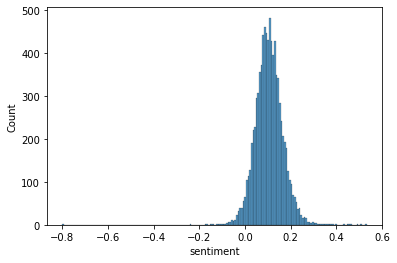

In [117]:
sns.histplot(data=df,x='sentiment')
plt.show()

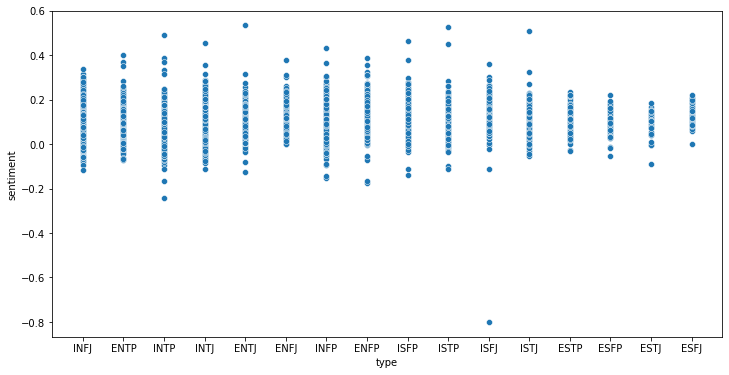

In [120]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='type',y='sentiment',data=df)
plt.show()

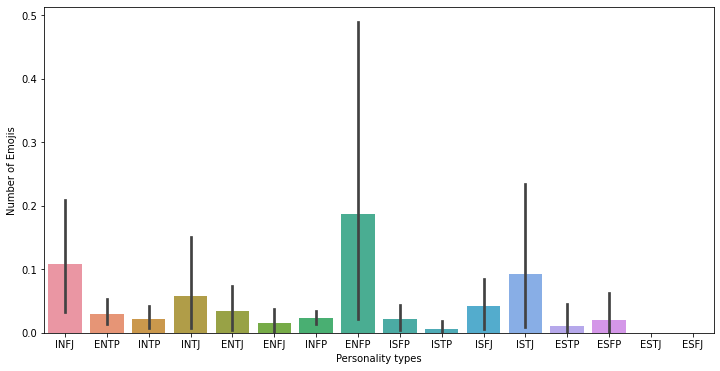

In [121]:
plt.figure(figsize = (12,6))
sns.barplot(x='type',y='emoji_count',data=df)
plt.xlabel('Personality types')
plt.ylabel('Number of Emojis')
plt.show()